# Group 10 project: Stroke Prediction

### Import necessary python libraries for the project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Task 2: Dataset Exploration

In [4]:
## Show the first 10 rows of the dataset
df = pd.read_csv("Data/healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Since the first collumn represent the id of the patient, which is used to identify the patient in this dataset, we can safely assume that this collumn will be redundant for this study and therefore can be safely removed

In [8]:
df=df.drop('id', axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Data Notes:
* Categorical: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `residence_type`, `smoking status`, `stroke`
* Numerical: (continuous) `age`, `avg_glucose_level`, `bmi`
* Missing value: `bmi`
* Data types: String, Int, Float

In [39]:
# Check out for feature with null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Convert datatype for categorical data to `category`

In [40]:
features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]
for feature in features:
    df[feature] = df[feature].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


#### Distribution of Categorical features:

In [41]:
df.describe(include =['category'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


#### Distribution of Numerical features:

In [42]:
df.describe().round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


## Task 3: Feature exploration

#### Handling feature with missing value, in our case, the only feature with missing data is the `BMI`. In this project, we will be using K-Nearest Neighbor technique to replace the missing values by imputation.

In [43]:
from sklearn.impute import KNNImputer

In [44]:
features = ['age', 'gender', 'avg_glucose_level', 'bmi']
df_copy = df[features].copy()
df_copy['gender'] = df_copy['gender'].map({'Male':0, 'Female':1, 'Other':-1}).astype(np.int8)

imputer = KNNImputer(n_neighbors=8)
df_imputed = imputer.fit_transform(df_copy)

df_imputed = pd.DataFrame(df_imputed, columns=df_copy.columns, index=df_copy.index)
df['bmi'] = df_imputed['bmi']

This technique will find 8 patients with the closest `age`, `gender`, and `avg_glucose_level` and compute the mean of these 8 patients' `bmi` and then assign to the missing value.

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


In [5]:
#check duplication data
df.duplicated().sum()

np.int64(0)

### Handling possible outliers for the Numerical feature: `age`, `avg_glucose_level`, and `bmi`:

* #### age


In [6]:
#Handle age , check z-score and outliers
df['age'].describe()


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [9]:
#check young age who got stroke
under_10_age = df[(df['age'] < 10) & (df['stroke'] == 1)]
under_10_age

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1


In [15]:
#Let check someone get married under age
married_under_age = df[(df['age'] < 18) & (df['ever_married'] == 'Yes')]
married_under_age

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z-score-Age


In [10]:
#Z-score
df['Z-score-Age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z-score-Age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.051331
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0.785993
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.626231
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.255317
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.582008


In [11]:
#Find outlier of Age
age_outliers = df[df['Z-score-Age'].abs() > 3]
print(age_outliers)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, Z-score-Age]
Index: []


### Age feature:
+ Total entries: 5110
+ Mean age: about 43.2 years
+ Standard deviation: about 22.6 years
+ Youngest one: 0.08 years
+ Oldest one: 82 years
+ Quartiles:
  - 25% of individuals are younger than 25
  - 50%  are younger than 45
  - 75%  are younger than 61
+ Stroke case under age 10: 1
+ No outliers detected  

* #### avg_glucose_level

* #### bmi

Number of BMI outliers: 59


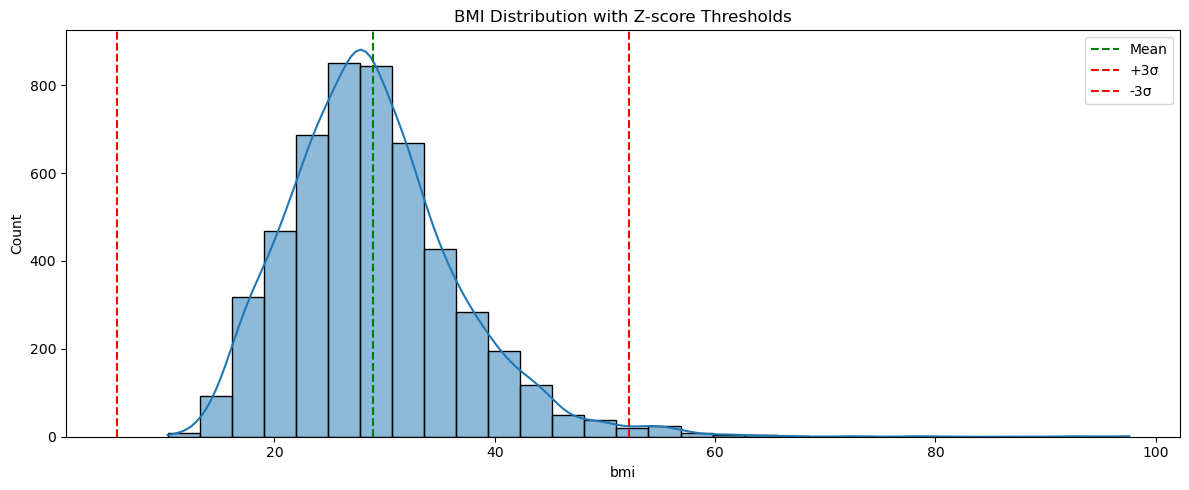

In [48]:
bmi = df['bmi']

bmi_zscore = (bmi - bmi.mean()) / bmi.std()

bmi_outliers = df[bmi_zscore.abs() > 3]

print("Number of BMI outliers:", len(bmi_outliers))

plt.figure(figsize=(12,5))
sns.histplot(bmi, bins=30, kde=True)

plt.axvline(bmi.mean(), color='green', linestyle='--', label='Mean')
plt.axvline(bmi.mean() + 3*bmi.std(), color='red', linestyle='--', label='+3σ')
plt.axvline(bmi.mean() - 3*bmi.std(), color='red', linestyle='--', label='-3σ')

plt.title("BMI Distribution with Z-score Thresholds")
plt.legend()
plt.tight_layout()
plt.show()


##### From the distribution, the `bmi` feature appears to be normal with a slightly right skewness, the number of outliers for bmi is 59/5110 or 1.15% which is relatively small. Since we are dealing with a medical related problem and the `bmi` score for extreme cases are still relevant in real life, we will keep these outliers in this study.